In [26]:
%load_ext autoreload
%autoreload 2

import random
import numpy as np
from scipy import stats
from qualitative_analysis import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
def calculate_probabilities(samples, step):
    prob_dist = stats.norm(loc=0, scale=step)
    scaling_constant = step * np.sqrt(2 * np.pi)
    pdf_values = prob_dist.pdf(samples) * scaling_constant
    prob = np.column_stack((1 - pdf_values, pdf_values))
    return prob

In [28]:
# configurable variables
variance = 4
variance_deviations = np.arange(-3, 4, .1)
true_prob_dist = stats.norm(loc=0, scale=variance)
samples = true_prob_dist.rvs(size=40000)

In [29]:
true_prob = calculate_probabilities(samples, variance)
true_labels = np.array(list(map(lambda x: 1 if random.random() < x[1] else 0, true_prob)))

Plotting Predicted Probability Distributions...


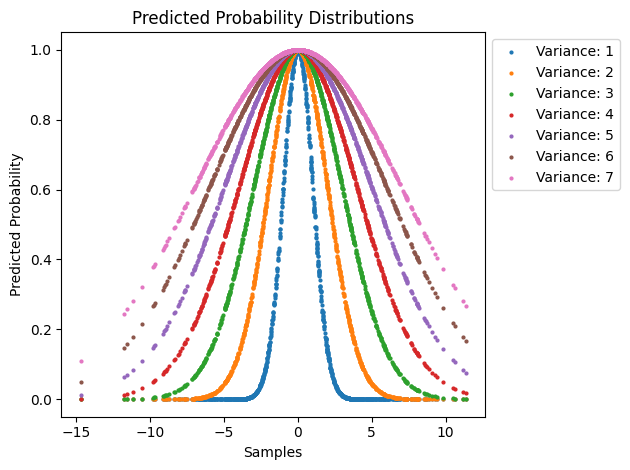

In [30]:
util.plot_pred_prob_dists(
    np.arange(variance - 3, variance + 4, 1),
    samples,
    calculate_probabilities,
    "Variance")

Plotting True Probability Reliability Diagram...


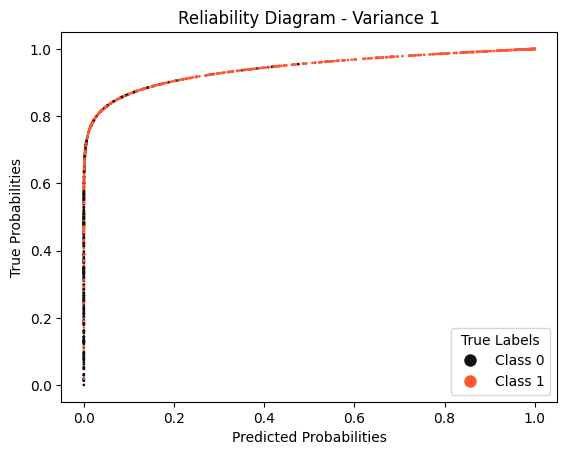

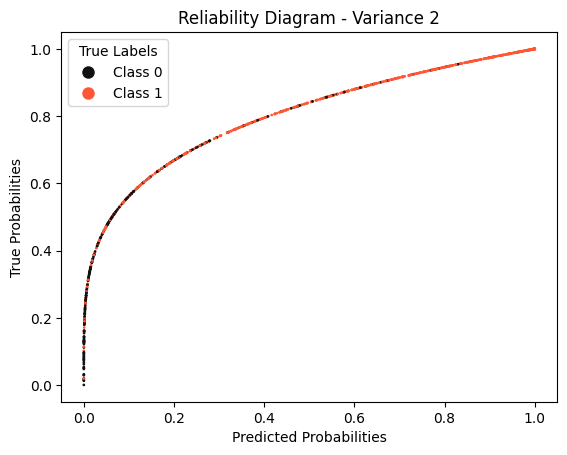

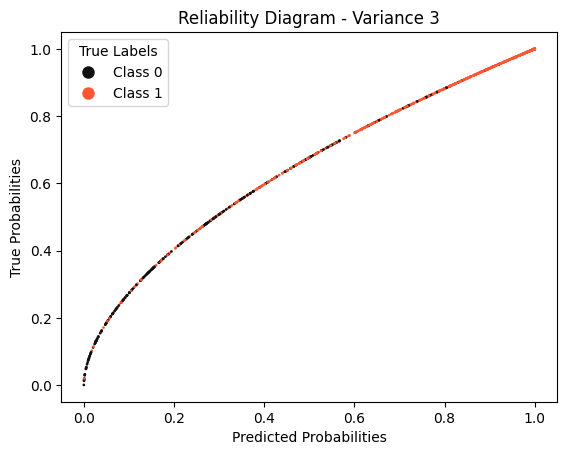

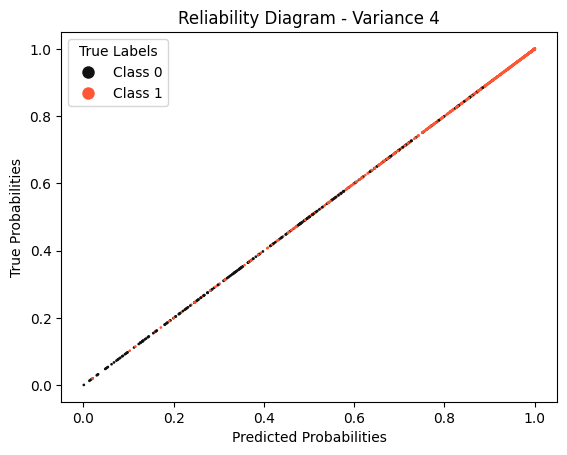

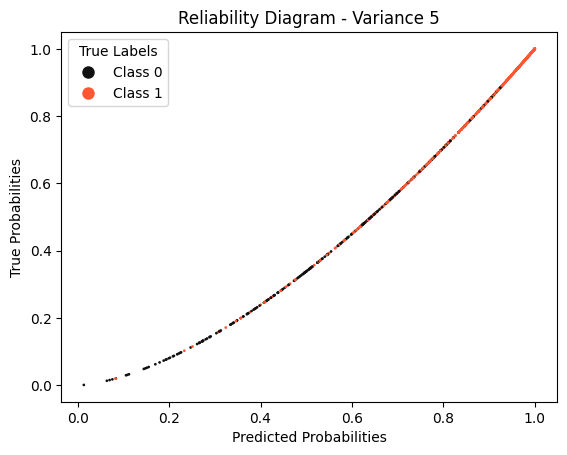

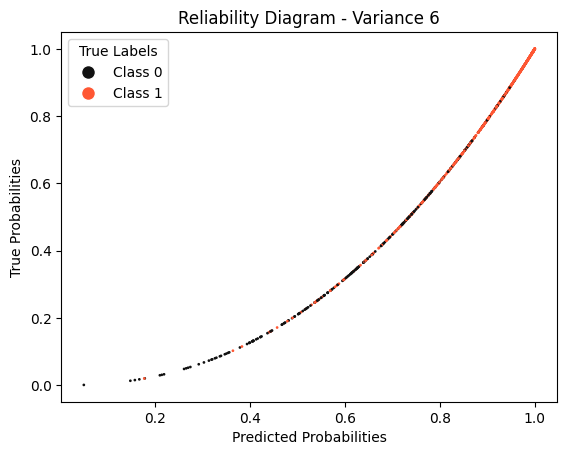

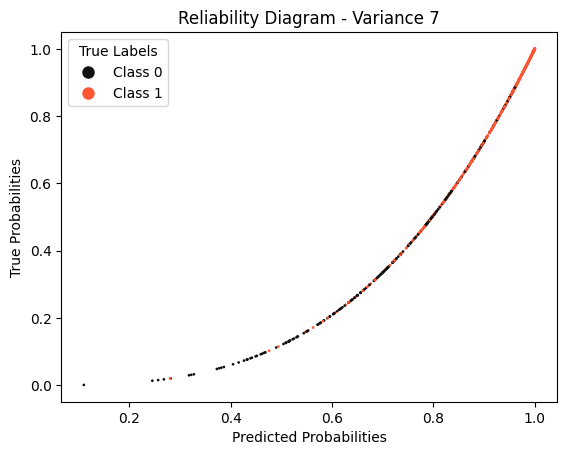

In [31]:
util.plot_true_prob_reliability_diagram(
    np.arange(variance - 3, variance + 4, 1),
    samples, true_prob, true_labels,
    calculate_probabilities,
    "Variance"
)

In [32]:
true_ece_vals, ece_vals, balance_score_vals, fce_vals, tce_vals, ksce_vals, ace_vals = (
    util.calculate_metrics(
        variance + variance_deviations,
        true_prob, true_labels, samples, 
        calculate_probabilities,
        log="Variance"
    )
)

Variance:  1.0
Variance:  1.1
Variance:  1.2000000000000002
Variance:  1.3000000000000003
Variance:  1.4000000000000004
Variance:  1.5000000000000004
Variance:  1.6000000000000005
Variance:  1.7000000000000006
Variance:  1.8000000000000007
Variance:  1.9000000000000008
Variance:  2.000000000000001
Variance:  2.100000000000001
Variance:  2.200000000000001
Variance:  2.300000000000001
Variance:  2.4000000000000012
Variance:  2.5000000000000013
Variance:  2.6000000000000014
Variance:  2.7000000000000015
Variance:  2.8000000000000016
Variance:  2.9000000000000017
Variance:  3.0000000000000018
Variance:  3.100000000000002
Variance:  3.200000000000002
Variance:  3.300000000000002
Variance:  3.400000000000002
Variance:  3.500000000000002
Variance:  3.6000000000000023
Variance:  3.7000000000000024
Variance:  3.8000000000000025
Variance:  3.9000000000000026
Variance:  4.000000000000003
Variance:  4.100000000000003
Variance:  4.200000000000003
Variance:  4.3000000000000025
Variance:  4.400000000

Plotting metrics...


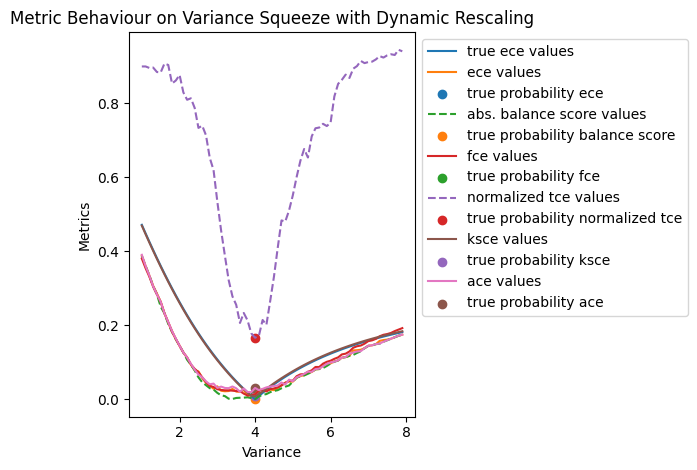

In [33]:
util.plot_metrics(
    variance, variance + variance_deviations,
    true_prob, true_labels,
    true_ece_vals, ece_vals, balance_score_vals, fce_vals, tce_vals, ksce_vals, ace_vals,
    "Metric Behaviour on Variance Squeeze with Dynamic Rescaling",
    "Variance"
)